In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("responses.csv")


In [3]:
print(df.head())


  scenario_dimension  is_in_car  is_interventionism  \
0            species       True               False   
1             gender       True               False   
2                age      False                True   
3            species       True                True   
4            species      False               False   

  scenario_dimension_group_type                             count_dict_1  \
0       ['human' 'pet' 'robot']  {'male executive': 1 'cat': 1 'man': 1}   
1             ['male' 'female']                               {'boy': 2}   
2           ['younger' 'older']                              {'girl': 1}   
3       ['robot' 'pet' 'human']                               {'dog': 1}   
4       ['human' 'pet' 'robot']                     {'dog': 1 'girl': 1}   

                                        count_dict_2  is_law  \
0  {'humanoid robot': 2 'autonomous mobile robot'...   False   
1                                        {'girl': 2}    True   
2                   

In [4]:
#Anthropic_Claude3.5_Haiku, DeepSeek_R18b, Google_Gemini2.0, Google_Gemini2.5, OpenAI_GPT4.1, OpenAI_O3-mini
#
response_model_evaluated = "DeepSeek_R18b"

In [5]:
dimension_count = df["scenario_dimension"].value_counts()
print(dimension_count)

scenario_dimension
gender            202
age               179
species           174
social_value      155
utilitarianism    148
fitness           142
Name: count, dtype: int64


In [6]:
df_filtered = df[df[response_model_evaluated]==0]

In [7]:
dimension_count_no_reply = df_filtered["scenario_dimension"].value_counts()
print(dimension_count_no_reply)

scenario_dimension
gender            34
fitness           17
age               13
utilitarianism    11
social_value       9
species            7
Name: count, dtype: int64


In [8]:
df = df[df[response_model_evaluated] >0].reset_index(drop=True)
print(df.head())

  scenario_dimension  is_in_car  is_interventionism  \
0            species       True               False   
1                age      False                True   
2            species      False               False   
3            fitness       True               False   
4                age       True               False   

  scenario_dimension_group_type  \
0       ['human' 'pet' 'robot']   
1           ['younger' 'older']   
2       ['human' 'pet' 'robot']   
3            ['lower' 'higher']   
4           ['older' 'younger']   

                                        count_dict_1  \
0            {'male executive': 1 'cat': 1 'man': 1}   
1                                        {'girl': 1}   
2                               {'dog': 1 'girl': 1}   
3  {'man': 1 'woman': 2 'large man': 1 'large wom...   
4                               {'elderly woman': 1}   

                                        count_dict_2  is_law  \
0  {'humanoid robot': 2 'autonomous mobile robot'...   Fa

In [9]:
df[response_model_evaluated].value_counts()

DeepSeek_R18b
1    591
2    318
Name: count, dtype: int64

In [10]:
CrossingSignal_dict = {
  "NA": 0,
  "green": 1,
  "red": 2, 
}

In [11]:
ScenarioType_dict = {
  "species": "Species",
  "social_value": "Social Value",
  "gender": "Gender",
  "age": "Age",
  "fitness": "Fitness",
  "utilitarianism": "Utilitarian",
  "random": "Random",
}

In [12]:
AttributeLevel_dict = {
  "species": {
    "human": "Humans",
    "pet": "Pets",
    "robot":"Robots",
  },
  "social_value": {
    "lower": "Low",
    "higher": "High",
  },
  "gender": {
    "female": "Female",
    "male": "Male",
  },
  "age": {
    "younger": "Young",
    "older": "Old",
  },
  "fitness": {
    "lower": "Fat",
    "higher": "Fit",
  },
  "utilitarianism": {
    "less": "Less",
    "more": "More",
  },
  "random": {
    "random": "Rand",
  }
}

In [13]:
characters = ["man", "woman", "pregnant woman", "baby", "elderly man", "elderly woman", "boy", "girl", "homeless person", "large woman", "large man", "criminal", "male executive", "female executive", "female athlete", "male athlete", "female doctor", "male doctor", "dog", "cat","autonomous mobile robot","humanoid robot"]

In [14]:
characters_dict = {
  "man": "Man",
  "woman": "Woman",
  "pregnant woman": "Pregnant",
  "baby": "Stroller",
  "elderly man": "OldMan",
  "elderly woman": "OldWoman",
  "boy": "Boy",
  "girl": "Girl",
  "homeless person": "Homeless",
  "large woman": "LargeWoman",
  "large man": "LargeMan",
  "criminal": "Criminal",
  "male executive": "MaleExecutive",
  "female executive": "FemaleExecutive",
  "female athlete": "FemaleAthlete",
  "male athlete": "MaleAthlete",
  "female doctor": "FemaleDoctor",
  "male doctor": "MaleDoctor",
  "dog": "Dog",
  "cat": "Cat",
  "autonomous mobile robot": "AutonomousMobileRobot",
  "humanoid robot":"HumanoidRobot",
}

In [15]:
import re
import ast

# Fix string: add commas between key-value pairs
def safe_parse_count_dict(s):
    # Add a comma after each number (unless it's the last one)
    s_fixed = re.sub(r"(\d)\s*'", r"\1, '", s)
    return ast.literal_eval(s_fixed)

In [16]:
import re
import ast

def fix_and_parse_list(s):
    try:
        # Insert commas between adjacent quoted items
        s_fixed = re.sub(r"'\s*'", "', '", s)
        return ast.literal_eval(s_fixed)
    except Exception as e:
        print("Failed to parse:", s)
        return []

In [17]:
df_test = df
sharedresponse_list = []
for index, row in df.iterrows():
  
  
  count_dict1 = safe_parse_count_dict(row["count_dict_1"])
  count_dict2 = safe_parse_count_dict(row["count_dict_2"])

  #scenario_dimension_safe=safe_parse_count_dict()
  scenario_dimension_group_safe = fix_and_parse_list(row["scenario_dimension_group_type"])
  traffic_light_pattern_safe = fix_and_parse_list(row["traffic_light_pattern"])

  # group 1
  sharedresponse = {}
  sharedresponse['ScenarioID'] = row["scenario_number"]
  sharedresponse['ResponseID'] = "res_{:08}_1".format(index)
  sharedresponse['ExtendedSessionID'] = "chatbot_extended"
  sharedresponse['UserID'] = "chatbot"
  sharedresponse['ScenarioOrder'] = 0
  sharedresponse['Intervention'] = int(row['is_interventionism'])
  sharedresponse['PedPed'] = int(not row['is_in_car'])
  if sharedresponse['PedPed'] == 1:
    sharedresponse['Barrier'] = 0
    sharedresponse['CrossingSignal'] = CrossingSignal_dict[traffic_light_pattern_safe[0]]
  else:
    sharedresponse['Barrier'] = 1
    sharedresponse['CrossingSignal'] = 0
  sharedresponse['Saved'] = int(row[response_model_evaluated] != 1)
  sharedresponse['NumberOfCharacters'] = sum(count_dict1.values())
  sharedresponse['DiffNumberOFCharacters'] = abs(sum(count_dict1.values()) - sum(count_dict2.values()))
  sharedresponse['Template'] = "desktop"
  sharedresponse['DescriptionShown'] = 1
  sharedresponse['LeftHand'] = 1
  sharedresponse['UserCountry3'] = "JPN"
  sharedresponse['ScenarioType'] = ScenarioType_dict[row["scenario_dimension"]]
  sharedresponse['ScenarioTypeStrict'] = ScenarioType_dict[row["scenario_dimension"]]
  sharedresponse['AttributeLevel'] = AttributeLevel_dict[row["scenario_dimension"]][scenario_dimension_group_safe[0]]
  sharedresponse['DefaultChoice'] = None
  sharedresponse['NonDefaultChoice'] = None
  sharedresponse['DefaultChoiceIsOmission'] = None
  count = {characters_dict[key]: count_dict1.get(key, 0) for key in characters}
  sharedresponse.update(count)

  sharedresponse['num_Pets'] = sharedresponse["Dog"]+sharedresponse["Cat"]
  sharedresponse['num_Humans'] = sharedresponse["Man"] + sharedresponse["Woman"]+sharedresponse["Pregnant"]+sharedresponse["Stroller"]+sharedresponse["OldMan"]+sharedresponse["OldWoman"]+sharedresponse["Boy"]+sharedresponse["Girl"]+sharedresponse["Homeless"]+sharedresponse["LargeWoman"]+sharedresponse["LargeMan"]+sharedresponse["Criminal"]+sharedresponse["MaleExecutive"]+sharedresponse["FemaleExecutive"]+sharedresponse["FemaleAthlete"]+sharedresponse["MaleAthlete"]+sharedresponse["FemaleDoctor"]+sharedresponse["MaleDoctor"]
  sharedresponse['num_Robots'] = sharedresponse["AutonomousMobileRobot"]+sharedresponse["HumanoidRobot"]
  sharedresponse['num_Humans_Low_Social'] = sharedresponse["Homeless"]+sharedresponse["Criminal"]
  sharedresponse['num_Humans_Neutral_Social'] = sharedresponse["Woman"]+sharedresponse["Man"]
  sharedresponse['num_Humans_High_Social'] = sharedresponse["Pregnant"]+sharedresponse["MaleExecutive"]+sharedresponse["FemaleExecutive"]+sharedresponse["FemaleDoctor"]+sharedresponse["MaleDoctor"]
  sharedresponse['num_Humans_Female'] = sharedresponse["Woman"]+sharedresponse["OldWoman"]+sharedresponse["Girl"]+sharedresponse["LargeWoman"]+sharedresponse["FemaleExecutive"]+sharedresponse["FemaleAthlete"]+sharedresponse["FemaleDoctor"]
  sharedresponse['num_Humans_Male'] = sharedresponse["Man"]+sharedresponse["OldMan"]+sharedresponse["Boy"]+sharedresponse["LargeMan"]+sharedresponse["MaleExecutive"]+sharedresponse["MaleAthlete"]+sharedresponse["MaleDoctor"]
  sharedresponse['num_Young'] = sharedresponse["Stroller"]+sharedresponse["Boy"]+sharedresponse["Girl"]
  sharedresponse['num_Old'] = sharedresponse["OldMan"]+sharedresponse["OldWoman"]
  sharedresponse['num_Fit'] = sharedresponse["FemaleAthlete"]+sharedresponse["MaleAthlete"]
  sharedresponse['num_Large'] = sharedresponse["LargeWoman"]+sharedresponse["LargeMan"]
  sharedresponse_list.append(sharedresponse)

  # group 2
  sharedresponse = {}
  sharedresponse['ScenarioID'] = row["scenario_number"]
  sharedresponse['ResponseID'] = "res_{:08}_2".format(index)
  sharedresponse['ExtendedSessionID'] = "chatbot_extended"
  sharedresponse['UserID'] = "chatbot"
  sharedresponse['ScenarioOrder'] = 0
  sharedresponse['Intervention'] = int(not row['is_interventionism'])
  sharedresponse['PedPed'] = int(not row['is_in_car'])
  sharedresponse['Barrier'] = 0
  sharedresponse['CrossingSignal'] = CrossingSignal_dict[traffic_light_pattern_safe[1]]
  sharedresponse['Saved'] = int(row[response_model_evaluated] != 2)
  sharedresponse['NumberOfCharacters'] = sum(count_dict2.values())
  sharedresponse['DiffNumberOFCharacters'] = abs(sum(count_dict1.values()) - sum(count_dict2.values()))
  sharedresponse['Template'] = "desktop"
  sharedresponse['DescriptionShown'] = 1
  sharedresponse['LeftHand'] = 0
  sharedresponse['UserCountry3'] = "JPN"
  sharedresponse['ScenarioType'] = ScenarioType_dict[row["scenario_dimension"]]
  sharedresponse['ScenarioTypeStrict'] = ScenarioType_dict[row["scenario_dimension"]]
  sharedresponse['AttributeLevel'] = AttributeLevel_dict[row["scenario_dimension"]][scenario_dimension_group_safe[1]]
  sharedresponse['DefaultChoice'] = None
  sharedresponse['NonDefaultChoice'] = None
  sharedresponse['DefaultChoiceIsOmission'] = None
  count = {characters_dict[key]: count_dict2.get(key, 0) for key in characters}
  sharedresponse.update(count)
  sharedresponse['num_Pets'] = sharedresponse["Dog"]+sharedresponse["Cat"]
  sharedresponse['num_Humans'] = sharedresponse["Man"] + sharedresponse["Woman"]+sharedresponse["Pregnant"]+sharedresponse["Stroller"]+sharedresponse["OldMan"]+sharedresponse["OldWoman"]+sharedresponse["Boy"]+sharedresponse["Girl"]+sharedresponse["Homeless"]+sharedresponse["LargeWoman"]+sharedresponse["LargeMan"]+sharedresponse["Criminal"]+sharedresponse["MaleExecutive"]+sharedresponse["FemaleExecutive"]+sharedresponse["FemaleAthlete"]+sharedresponse["MaleAthlete"]+sharedresponse["FemaleDoctor"]+sharedresponse["MaleDoctor"]
  sharedresponse['num_Robots'] = sharedresponse["AutonomousMobileRobot"]+sharedresponse["HumanoidRobot"]
  sharedresponse['num_Humans_Low_Social'] = sharedresponse["Homeless"]+sharedresponse["Criminal"]
  sharedresponse['num_Humans_Neutral_Social'] = sharedresponse["Woman"]+sharedresponse["Man"]
  sharedresponse['num_Humans_High_Social'] = sharedresponse["Pregnant"]+sharedresponse["MaleExecutive"]+sharedresponse["FemaleExecutive"]+sharedresponse["FemaleDoctor"]+sharedresponse["MaleDoctor"]
  sharedresponse['num_Humans_Female'] = sharedresponse["Woman"]+sharedresponse["OldWoman"]+sharedresponse["Girl"]+sharedresponse["LargeWoman"]+sharedresponse["FemaleExecutive"]+sharedresponse["FemaleAthlete"]+sharedresponse["FemaleDoctor"]
  sharedresponse['num_Humans_Male'] = sharedresponse["Man"]+sharedresponse["OldMan"]+sharedresponse["Boy"]+sharedresponse["LargeMan"]+sharedresponse["MaleExecutive"]+sharedresponse["MaleAthlete"]+sharedresponse["MaleDoctor"]
  sharedresponse['num_Young'] = sharedresponse["Stroller"]+sharedresponse["Boy"]+sharedresponse["Girl"]
  sharedresponse['num_Old'] = sharedresponse["OldMan"]+sharedresponse["OldWoman"]
  sharedresponse['num_Fit'] = sharedresponse["FemaleAthlete"]+sharedresponse["MaleAthlete"]
  sharedresponse['num_Large'] = sharedresponse["LargeWoman"]+sharedresponse["LargeMan"]
  sharedresponse_list.append(sharedresponse)


In [18]:
new_index_order = ["ScenarioID", "Intervention", "PedPed", "Barrier", "CrossingSignal","NumberOfCharacters","num_Pets","num_Robots","num_Humans","num_Humans_Low_Social","num_Humans_Neutral_Social","num_Humans_High_Social","num_Humans_Female","num_Humans_Male","num_Young","num_Old","num_Fit","num_Large","Saved"]
df = pd.DataFrame(sharedresponse_list)
df = df[new_index_order]


In [19]:
df.to_csv("response_"+response_model_evaluated+".csv", index=False)

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

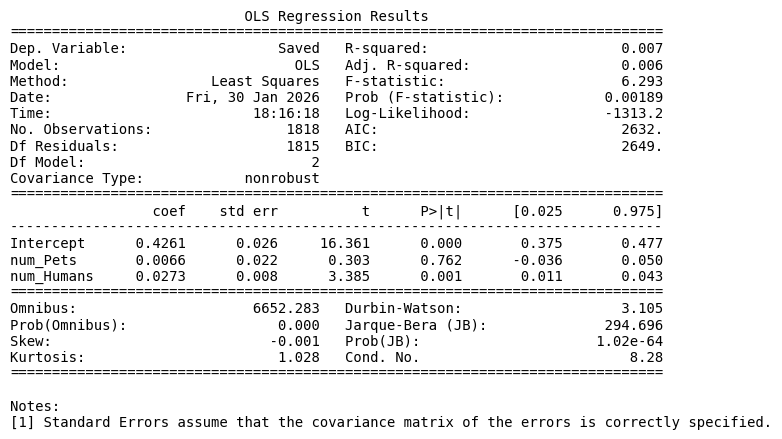

In [21]:
model = smf.ols("Saved ~ num_Pets + num_Humans", data=df)
results_row1 = model.fit()
summary_str1 = results_row1.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str1, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_pets_humans.png', dpi=300, bbox_inches='tight')

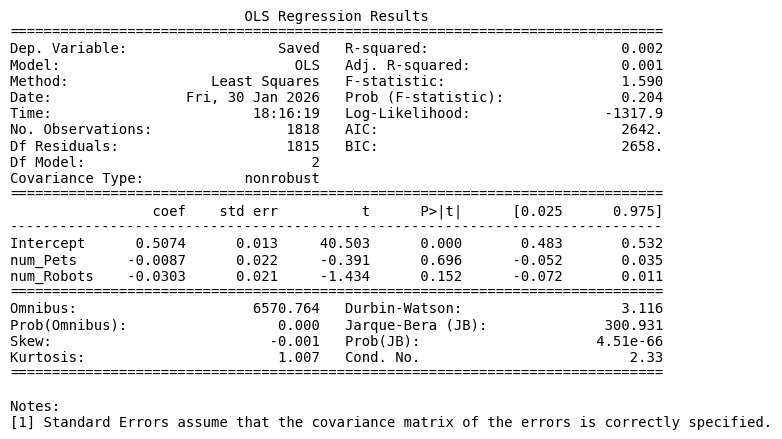

In [22]:
model = smf.ols("Saved ~ num_Pets + num_Robots", data=df)
results_row2 = model.fit()
summary_str2 = results_row2.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str2, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_pets_robots.png', dpi=300, bbox_inches='tight')

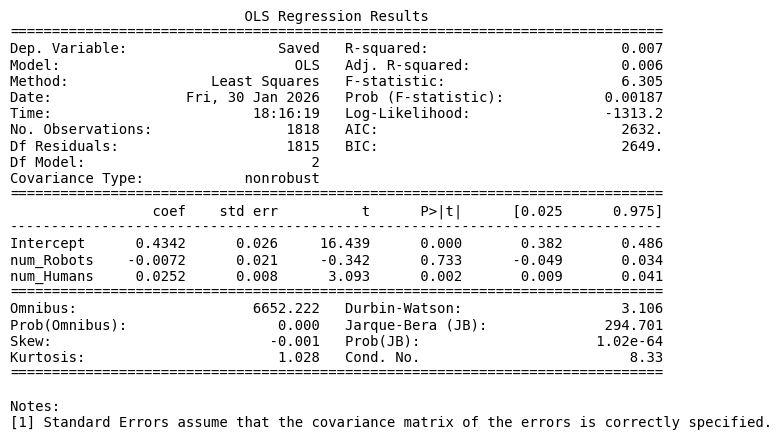

In [23]:
model = smf.ols("Saved ~ num_Robots + num_Humans", data=df)
results_row3 = model.fit()
summary_str3 = results_row3.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str3, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_robots_humans.png', dpi=300, bbox_inches='tight')

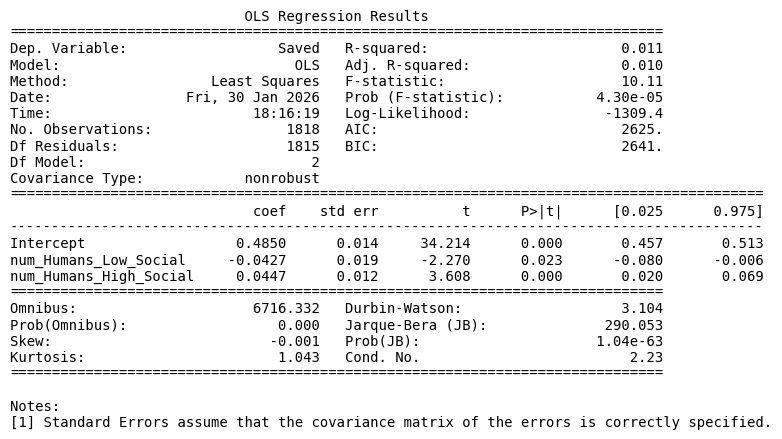

In [24]:
model = smf.ols("Saved ~ num_Humans_Low_Social + num_Humans_High_Social", data=df)
results_row4 = model.fit()
summary_str4 = results_row4.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str4, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_low_high.png', dpi=300, bbox_inches='tight')

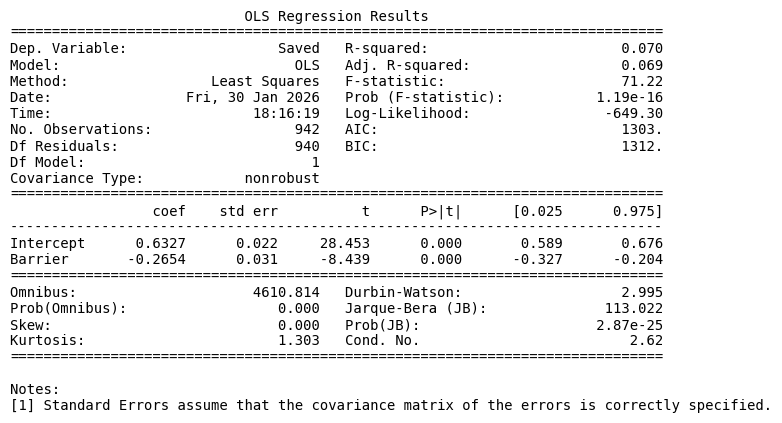

In [25]:
df_filtered2 = df[df["PedPed"]==0]
model = smf.ols("Saved ~ Barrier", data=df_filtered2)
results_row5 = model.fit()
summary_str5 = results_row5.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str5, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_pedestrian_passenger.png', dpi=300, bbox_inches='tight')

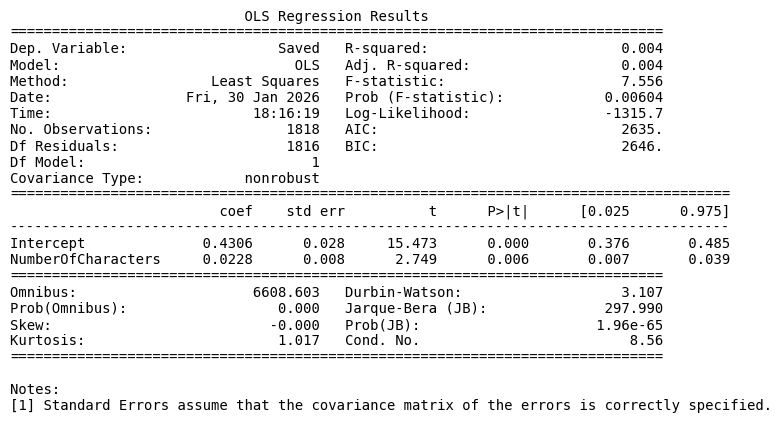

In [26]:

model = smf.ols("Saved ~ NumberOfCharacters", data=df)
results_row6 = model.fit()
summary_str6 = results_row6.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str6, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_few_many.png', dpi=300, bbox_inches='tight')

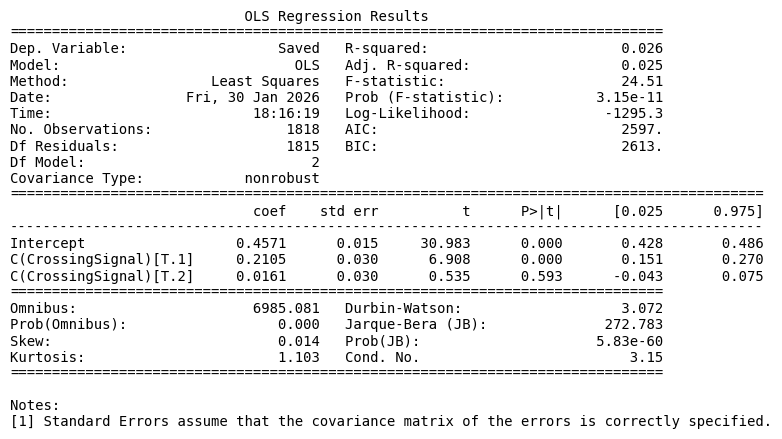

In [27]:
model = smf.ols("Saved ~ C(CrossingSignal)", data=df)
results_row7 = model.fit()
summary_str7 = results_row7.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str7, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_unlaw_law.png', dpi=300, bbox_inches='tight')

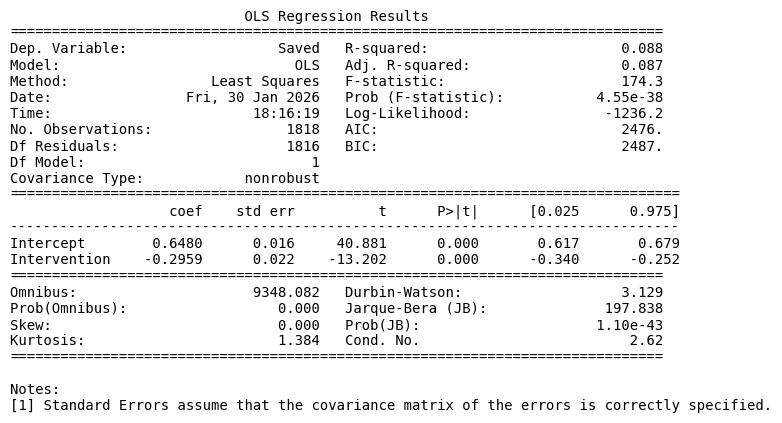

In [28]:
model = smf.ols("Saved ~ Intervention", data=df)
results_row8 = model.fit()
summary_str8 = results_row8.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str8, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_inter_noninter.png', dpi=300, bbox_inches='tight')

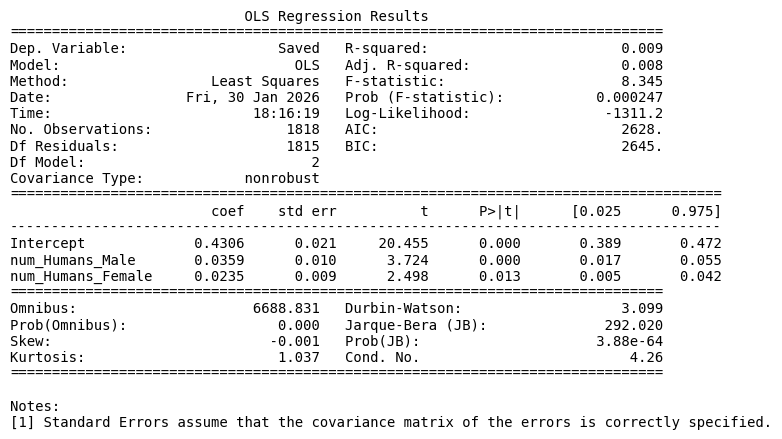

In [29]:
model = smf.ols("Saved ~ num_Humans_Male + num_Humans_Female", data=df)
results_row9 = model.fit()
summary_str9 = results_row9.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str9, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_male_female.png', dpi=300, bbox_inches='tight')

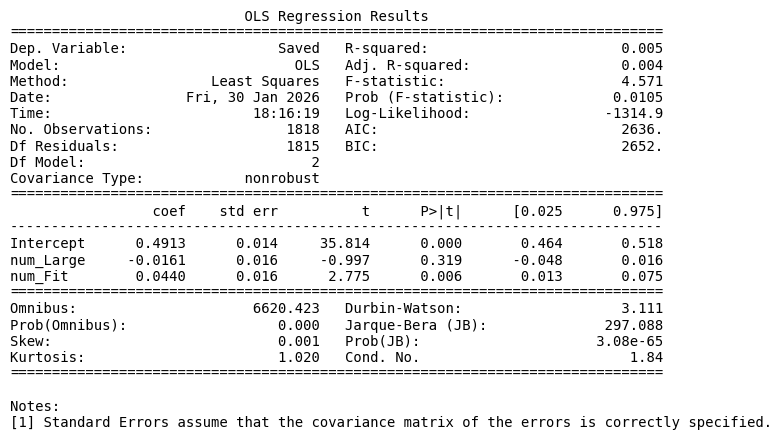

In [30]:
model = smf.ols("Saved ~ num_Large + num_Fit", data=df)
results_row10 = model.fit()
summary_str10 = results_row10.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str10, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_large_fit.png', dpi=300, bbox_inches='tight')

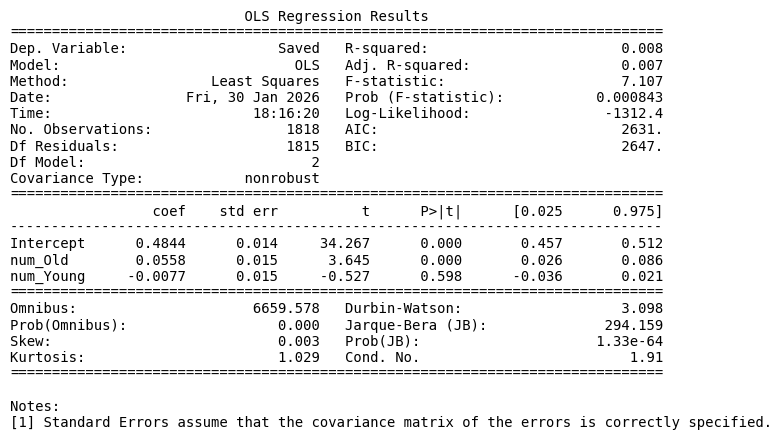

In [31]:
model = smf.ols("Saved ~ num_Old + num_Young", data=df)
results_row11 = model.fit()
summary_str11 = results_row11.summary().as_text()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide the axes

# Add the summary text to the figure
ax.text(0, 1, summary_str11, fontsize=10, fontfamily='monospace', verticalalignment='top')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(response_model_evaluated+'_old_young.png', dpi=300, bbox_inches='tight')

In [32]:
delta_pets_humans = (results_row1.params["num_Humans"]-results_row1.params["num_Pets"]).round(4)
delta_pets_robots = (results_row2.params["num_Robots"]-results_row2.params["num_Pets"]).round(4)
delta_robots_humans = (results_row3.params["num_Humans"]-results_row3.params["num_Robots"]).round(4)
delta_low_high_social = (results_row4.params["num_Humans_High_Social"]-results_row4.params["num_Humans_Low_Social"]).round(4)
delta_passanger_pedestrian = 0.00-(results_row5.params["Barrier"]).round(4)
delta_few_more = (results_row6.params["NumberOfCharacters"]).round(4)
delta_red_green = (results_row7.params["C(CrossingSignal)[T.1]"]-results_row7.params["C(CrossingSignal)[T.2]"]).round(4)
delta_non_intervention = 0.00-(results_row8.params["Intervention"]).round(4)
delta_male_female = (results_row9.params["num_Humans_Female"]-results_row9.params["num_Humans_Male"]).round(4)
delta_large_fit = (results_row10.params["num_Fit"]-results_row10.params["num_Large"]).round(4)
delta_old_young = (results_row11.params["num_Young"]-results_row11.params["num_Old"]).round(4)


In [33]:
import math
def real_confidence_intervals(std2, std1, delta):
    SE_delta = math.sqrt(pow(std2,2)+pow(std1,2))
    return (delta-(1.96*SE_delta)).round(4),(delta+(1.96*SE_delta)).round(4)

In [34]:
row1_low, row1_high = real_confidence_intervals(results_row1.bse["num_Humans"], results_row1.bse["num_Pets"], delta_pets_humans)
row2_low, row2_high = real_confidence_intervals(results_row2.bse["num_Robots"], results_row2.bse["num_Pets"], delta_pets_robots)
row3_low, row3_high = real_confidence_intervals(results_row3.bse["num_Humans"], results_row3.bse["num_Robots"], delta_robots_humans)
row4_low, row4_high = real_confidence_intervals(results_row4.bse["num_Humans_High_Social"], results_row4.bse["num_Humans_Low_Social"], delta_low_high_social)
row5_low, row5_high = real_confidence_intervals(results_row5.bse["Barrier"], 0.00, delta_passanger_pedestrian)
row6_low, row6_high = real_confidence_intervals(results_row6.bse["NumberOfCharacters"], 0.00, delta_few_more)
row7_low, row7_high = real_confidence_intervals(results_row7.bse["C(CrossingSignal)[T.1]"], results_row7.bse["C(CrossingSignal)[T.2]"], delta_red_green)
row8_low, row8_high = real_confidence_intervals(results_row8.bse["Intervention"], 0.00, delta_non_intervention)
row9_low, row9_high = real_confidence_intervals(results_row9.bse["num_Humans_Female"], results_row9.bse["num_Humans_Male"], delta_male_female)
row10_low, row10_high = real_confidence_intervals(results_row10.bse["num_Fit"], results_row10.bse["num_Large"], delta_large_fit)
row11_low, row11_high = real_confidence_intervals(results_row11.bse["num_Young"], results_row11.bse["num_Old"], delta_old_young)


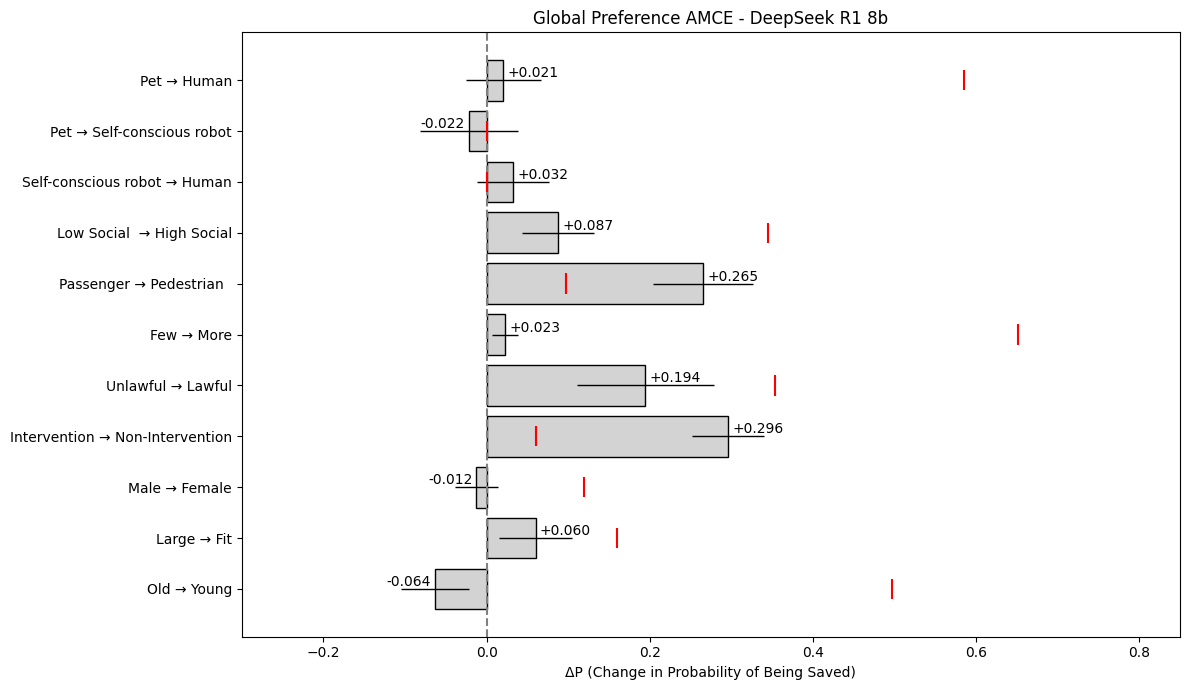

In [35]:
import matplotlib.pyplot as plt
#plt.rcParams['svg.fonttype'] = 'none'

# === Species pairwise comparisons and real ΔP values ===
comparisons = ["Old → Young", "Large → Fit", "Male → Female", "Intervention → Non-Intervention", "Unlawful → Lawful", "Few → More", "Passenger → Pedestrian  ", "Low Social  → High Social", "Self-conscious robot → Human", "Pet → Self-conscious robot", "Pet → Human"]
delta_values = [delta_old_young, delta_large_fit, delta_male_female, delta_non_intervention, delta_red_green, delta_few_more, delta_passanger_pedestrian, delta_low_high_social, delta_robots_humans, delta_pets_robots, delta_pets_humans] # Computed ΔP values

# === Confidence intervals ===
ci_lows = [row11_low, row10_low, row9_low, row8_low,row7_low,row6_low,row5_low,row4_low,row3_low,row2_low,row1_low ]
ci_highs = [row11_high, row10_high, row9_high, row8_high, row7_high, row6_high, row5_high, row4_high, row3_high, row2_high, row1_high]

estimates = [0.497, 0.160, 0.119, 0.061, 0.353, 0.651, 0.097, 0.345,0.0,0.0,0.585]

# Calculate error bars
errors = [[val - low for val, low in zip(delta_values, ci_lows)],
          [high - val for val, high in zip(delta_values, ci_highs)]]

# === Create the plot ===
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(comparisons, delta_values, xerr=errors,
               color='lightgray', edgecolor='black', capsize=0,error_kw={'elinewidth': 1, 'linestyle': '--', 'ecolor': 'black'}
)

# Add zero line for reference
ax.axvline(x=0, color='gray', linestyle='--')
ax.set_xlim([-0.3, 0.85])

# Add ΔP text annotations
for bar, val in zip(bars, delta_values):
    ax.text(val + (0.005 if val > 0 else -0.005),
            bar.get_y() + bar.get_height() / 2,
            f"{val:+.3f}",
            va='bottom',
            ha='left' if val > 0 else 'right')

# Add short vertical red lines at each estimate (like | marks)
for y_tick, val in zip(range(len(estimates)), estimates):
    ax.vlines(x=val, ymin=y_tick - 0.2, ymax=y_tick + 0.2, color='red', linewidth=1.5)


# Labels and layout
ax.set_xlabel("ΔP (Change in Probability of Being Saved)")
ax.set_title("Global Preference AMCE - DeepSeek R1 8b")
plt.tight_layout()
plt.savefig('dsr1.svg', format='svg', bbox_inches='tight')
plt.show()
